<a href="https://colab.research.google.com/github/Summer99D/MLF_Final/blob/main/MLF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install category_encoders pandas numpy seaborn missingno scikit-learn matplotlib

In [74]:
import warnings
warnings.filterwarnings('ignore')


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
test_trns_df= pd.read_csv('/content/drive/MyDrive/MLF/test_transaction.csv')
test_id_df= pd.read_csv('/content/drive/MyDrive/MLF/test_identity.csv')
train_trns_df= pd.read_csv('/content/drive/MyDrive/MLF/train_transaction.csv')
train_id_df= pd.read_csv('/content/drive/MyDrive/MLF/train_identity.csv')


In [78]:
print(test_trns_df.describe)

<bound method NDFrame.describe of         TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224          31.950         W  10409  111.0   
1             3663550       18403263          49.000         W   4272  111.0   
2             3663551       18403310         171.000         W   4476  574.0   
3             3663552       18403310         284.950         W  10989  360.0   
4             3663553       18403317          67.950         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279          94.679         C  13832  375.0   
506687        4170236       34214287          12.173         C   3154  408.0   
506688        4170237       34214326          49.000         W  16661  490.0   
506689        4170238       34214337         202.000         W  16621  516.0   
506690        4170239       34214345          24.346         C   5713  168.0   

     

In [79]:
print(test_id_df.describe)

<bound method NDFrame.describe of         TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  \
0             3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN   
1             3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN   
2             3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN   
3             3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN   
4             3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
141902        4170230  -20.0  473365.0    NaN    NaN    0.0    0.0    NaN   
141903        4170233   -5.0  489917.0    0.0    0.0   -4.0  -32.0    NaN   
141904        4170234   -5.0  110081.0    NaN    NaN   22.0  -31.0    NaN   
141905        4170236  -45.0  266704.0    NaN    NaN   -3.0  -10.0    NaN   
141906        4170239  -10.0  692090.0    0.0    0.0    0.0    0.0    NaN   

        id-08  id-09  ...                

In [80]:
print(train_id_df.describe)
print(train_id_df.columns)

<bound method NDFrame.describe of         TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  \
0             2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN   
1             2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN   
2             2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN   
3             2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN   
4             2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0    0.0    0.0    NaN   
144229        3577526   -5.0  172059.0    NaN    NaN    1.0   -5.0    NaN   
144230        3577529  -20.0  632381.0    NaN    NaN   -1.0  -36.0    NaN   
144231        3577531   -5.0   55528.0    0.0    0.0    0.0   -7.0    NaN   
144232        3577534  -45.0  339406.0    NaN    NaN  -10.0 -100.0    NaN   

        id_08  id_09  ...                

In [81]:
print(train_trns_df.describe)
print(train_trns_df.columns)

<bound method NDFrame.describe of         TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ... V330  V331  V

In [82]:
## I will be merging on "transaction id"
train_merged= pd.merge(train_trns_df, train_id_df, on='TransactionID', how='left')
test_merged= pd.merge(test_trns_df, test_id_df, on='TransactionID', how='left')

In [83]:
print(train_merged.shape)## we have 434 variables
print(test_merged.shape)

(590540, 434)
(506691, 433)


### Inspecting NaNs

Training data

In [84]:
# Step 1: Calculate NaN statistics
nan_percentage_train = train_merged.isnull().mean() * 100
nan_percentage_train = nan_percentage_train.sort_values(ascending=False)

# Step 2: Summary statistics
print("NaN Distribution Across Columns:")
print(f"Total rows: {train_merged.shape[0]}")
print(f"Total columns: {train_merged.shape[1]}")
print(f"Columns with >90% missing values: {(nan_percentage_train > 90).sum()}") ##removing columns with more than 90% missing vlaues
print("\nTop 10 columns with highest missing values:")
print(nan_percentage_train.head(10))


NaN Distribution Across Columns:
Total rows: 590540
Total columns: 434
Columns with >90% missing values: 12

Top 10 columns with highest missing values:
id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
id_26    99.125715
id_22    99.124699
id_27    99.124699
id_23    99.124699
dist2    93.628374
dtype: float64


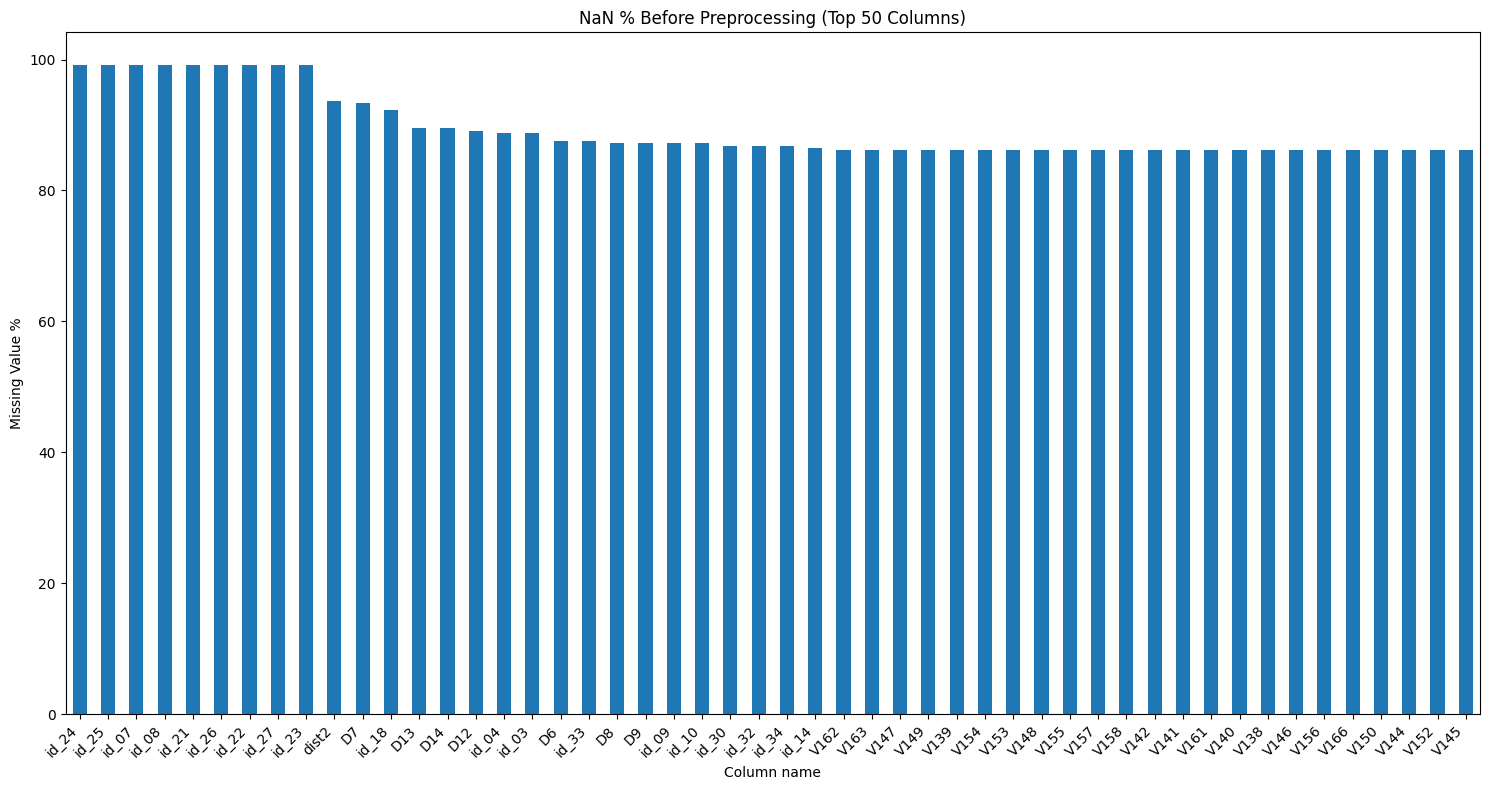

In [85]:
# Plot 1: Bar plot of NaN percentages (top 50 columns)
plt.figure(figsize=(15, 8))
nan_percentage_train.head(50).plot(kind='bar')
plt.title('NaN % Before Preprocessing (Top 50 Columns)')
plt.xlabel('Column name')
plt.ylabel('Missing Value %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/nan_bar_plot_before.png')
plt.show()

In [86]:
print(nan_percentage_train.describe)

<bound method NDFrame.describe of id_24             99.196159
id_25             99.130965
id_07             99.127070
id_08             99.127070
id_21             99.126393
                    ...    
ProductCD          0.000000
TransactionAmt     0.000000
TransactionDT      0.000000
isFraud            0.000000
TransactionID      0.000000
Length: 434, dtype: float64>


In [87]:
# Remove columns with >90% missing values
columns_to_drop = nan_percentage_train[nan_percentage_train > 90].index
print(f"Removing {len(columns_to_drop)} columns with >90% missing values:")
print(columns_to_drop.tolist())
train_data_cleaned = train_merged.drop(columns=columns_to_drop)

Removing 12 columns with >90% missing values:
['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_27', 'id_23', 'dist2', 'D7', 'id_18']


In [88]:
## I wanna check data types
train_data_cleaned.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
id_36,object
id_37,object
id_38,object
DeviceType,object


In [89]:
# Impute NaNs in all columns with the mean (for numeric columns only)
train_data_cleaned = train_data_cleaned.fillna(train_data_cleaned.mean(numeric_only=True))

In [90]:
from sklearn.impute import SimpleImputer

# Identify column types
num_cols = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_data_cleaned.select_dtypes(include=['object', 'category']).columns

num_imputer = SimpleImputer(strategy='median')
train_data_cleaned[num_cols] = num_imputer.fit_transform(train_data_cleaned[num_cols])


cat_imputer = SimpleImputer(strategy='most_frequent')
train_data_cleaned[cat_cols] = cat_imputer.fit_transform(train_data_cleaned[cat_cols])


In [91]:
# Verify no NaNs
nan_percentage_cleaned = train_data_cleaned.isnull().mean() * 100
print("\nNaN percentages after imputation (should be 0%):")
print(nan_percentage_cleaned[nan_percentage_cleaned > 0])


NaN percentages after imputation (should be 0%):
Series([], dtype: float64)


Test Data

In [92]:
# Step 1: Calculate NaN statistics
nan_percentage_test = test_merged.isnull().mean() * 100
nan_percentage_test = nan_percentage_test.sort_values(ascending=False)

# Step 2: Summary statistics
print("NaN Distribution Across Columns:")
print(f"Total rows: {test_merged.shape[0]}")
print(f"Total columns: {test_merged.shape[1]}")
print(f"Columns with >90% missing values: {(nan_percentage_test > 90).sum()}") ##removing columns with more than 90% missing vlaues
print("\nTop 10 columns with highest missing values:")
print(nan_percentage_test.head(10))

NaN Distribution Across Columns:
Total rows: 506691
Total columns: 433
Columns with >90% missing values: 10

Top 10 columns with highest missing values:
id-24    99.064519
id-25    99.005508
id-26    99.003929
id-21    99.001561
id-08    99.001561
id-07    99.001561
id-27    99.000969
id-23    99.000969
id-22    99.000969
dist2    92.809030
dtype: float64


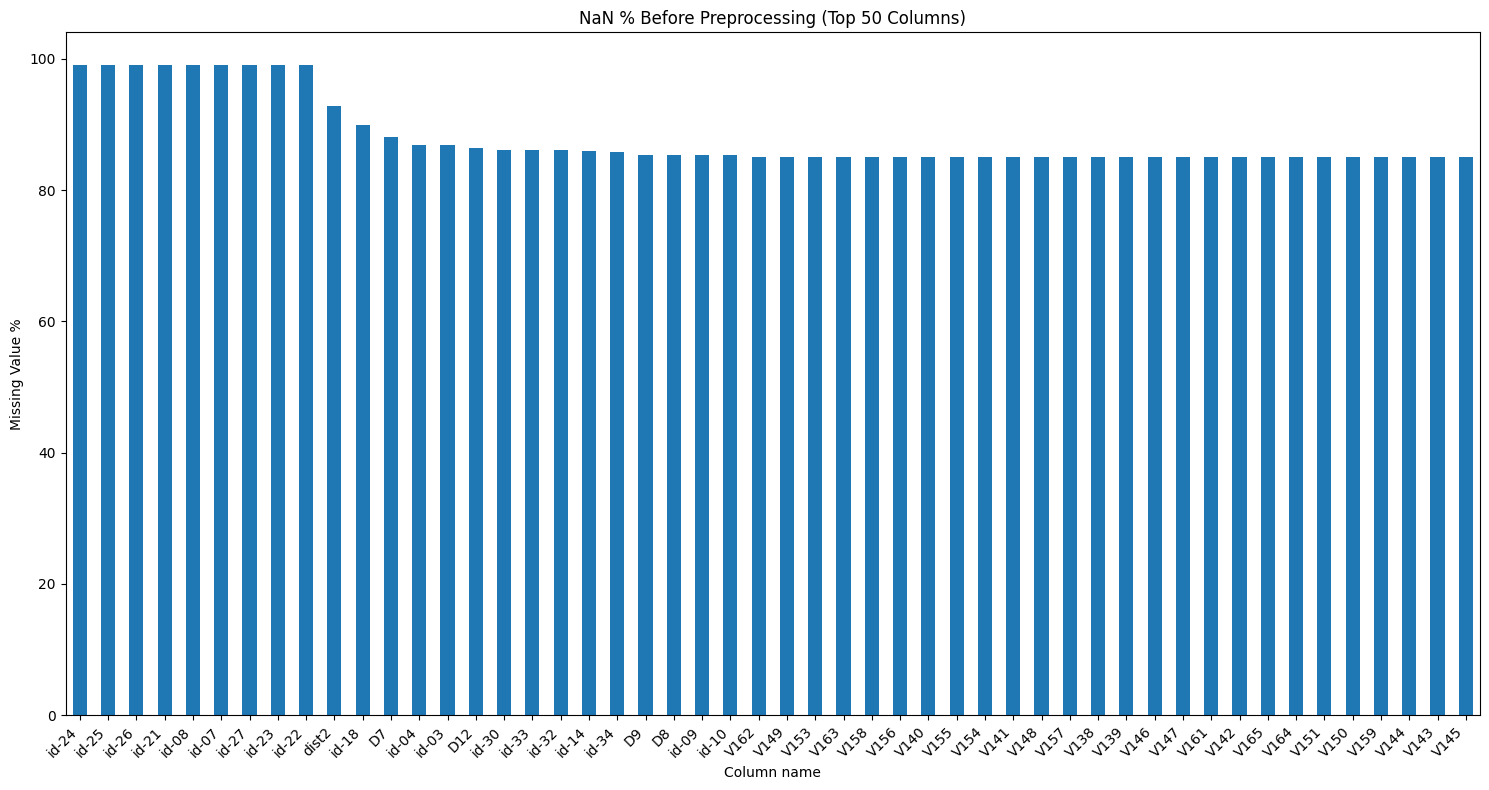

In [93]:
# Bar plot: Top 50 columns
plt.figure(figsize=(15, 8))
nan_percentage_test.head(50).plot(kind='bar')
plt.title('NaN % Before Preprocessing (Top 50 Columns)')
plt.xlabel('Column name')
plt.ylabel('Missing Value %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/nan_bar_plot_before.png')
plt.show()

In [94]:
# Remove columns with >30% missing values
columns_to_drop_test = nan_percentage_test[nan_percentage_test > 30].index
print(f"Removing {len(columns_to_drop_test)} columns with >30% missing values:")
print(columns_to_drop_test.tolist())
test_data_cleaned = test_merged.drop(columns=columns_to_drop_test)

Removing 233 columns with >30% missing values:
['id-24', 'id-25', 'id-26', 'id-21', 'id-08', 'id-07', 'id-27', 'id-23', 'id-22', 'dist2', 'id-18', 'D7', 'id-04', 'id-03', 'D12', 'id-30', 'id-33', 'id-32', 'id-14', 'id-34', 'D9', 'D8', 'id-09', 'id-10', 'V162', 'V149', 'V153', 'V163', 'V158', 'V156', 'V140', 'V155', 'V154', 'V141', 'V148', 'V157', 'V138', 'V139', 'V146', 'V147', 'V161', 'V142', 'V165', 'V164', 'V151', 'V150', 'V159', 'V144', 'V143', 'V145', 'V152', 'V166', 'V160', 'V327', 'V335', 'V336', 'V326', 'V325', 'V338', 'V339', 'V337', 'V324', 'V328', 'V329', 'V331', 'V330', 'V322', 'V323', 'V334', 'V332', 'V333', 'DeviceInfo', 'D14', 'D13', 'D6', 'id-16', 'V253', 'V229', 'V265', 'V266', 'V267', 'V264', 'V260', 'V263', 'V262', 'V261', 'V273', 'V274', 'V275', 'V269', 'V268', 'V278', 'V277', 'V276', 'V249', 'V236', 'V240', 'V237', 'V246', 'V244', 'V247', 'V248', 'V257', 'V258', 'V254', 'V241', 'V232', 'V242', 'V243', 'V228', 'V252', 'V231', 'V230', 'V233', 'V226', 'V235', 'V223', 

## Removing highly correlated features


In [95]:
# 1. Compute correlation matrix
corr_matrix = train_data_cleaned.corr(numeric_only=True).abs()

# 2. Create a mask for the upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find columns with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 4. Drop those columns
train_data_cleaned_reduced = train_data_cleaned.drop(columns=to_drop)

## Before running PCA: encoding

In [96]:
# Step 3: Prepare for PCA
X = train_data_cleaned_reduced.drop(columns=['isFraud', 'TransactionID'])
y = train_data_cleaned_reduced['isFraud']


In [97]:
##encoding them!
print("\nCategorical Columns:", cat_cols.tolist())



Categorical Columns: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [98]:
print(train_data_cleaned_reduced[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']].head())

  M1 M2 M3  M4 M5 M6 M7 M8 M9     id_12  ...        id_30  \
0  T  T  T  M2  F  T  F  F  T  NotFound  ...   Windows 10   
1  T  T  T  M0  T  T  F  F  T  NotFound  ...   Windows 10   
2  T  T  T  M0  F  F  F  F  F  NotFound  ...   Windows 10   
3  T  T  T  M0  T  F  F  F  T  NotFound  ...   Windows 10   
4  T  T  T  M0  F  F  F  F  T  NotFound  ...  Android 7.0   

                 id_31      id_33           id_34 id_35 id_36 id_37 id_38  \
0          chrome 63.0  1920x1080  match_status:2     T     F     T     F   
1          chrome 63.0  1920x1080  match_status:2     T     F     T     F   
2          chrome 63.0  1920x1080  match_status:2     T     F     T     F   
3          chrome 63.0  1920x1080  match_status:2     T     F     T     F   
4  samsung browser 6.2  2220x1080  match_status:2     T     F     T     T   

  DeviceType                     DeviceInfo  
0    desktop                        Windows  
1    desktop                        Windows  
2    desktop                    

In [99]:
print(train_data_cleaned_reduced['DeviceType'].unique())

['desktop' 'mobile']


In [100]:
print(train_data_cleaned_reduced['DeviceInfo'].unique())

['Windows' 'SAMSUNG SM-G892A Build/NRD90M' 'iOS Device' ...
 'LDN-LX3 Build/HUAWEILDN-LX3' 'Z955A' 'LG-E975']


In [101]:
train_data_cleaned_reduced['DeviceType'] = train_data_cleaned_reduced['DeviceType'].map({'desktop': 1, 'mobile': 0}).fillna(-1).astype(int)

In [102]:
##if device info windows or iOS 1, else 0
train_data_cleaned_reduced['DeviceInfo'] = train_data_cleaned_reduced['DeviceInfo'].str.contains(r'Windows|iOS Device', case=False, na=False).astype(int)

In [103]:
# Replace 'T' with 1 and 'F' with 0 in all string/object columns
train_data_cleaned_reduced = train_data_cleaned_reduced.replace({'T': 1, 'F': 0})

In [104]:
print(train_data_cleaned_reduced['M4'].unique())

['M2' 'M0' 'M1']


In [105]:
# Define the mapping
m4_map = {'M2': 2, 'M0': 0, 'M1': 1}

# Apply the mapping
train_data_cleaned_reduced['M4'] = train_data_cleaned_reduced['M4'].map(m4_map)

In [106]:
train_data_cleaned_reduced['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [107]:
train_data_cleaned_reduced['ProductCD'].value_counts()

,count
ProductCD,
W,439670
C,68519
R,37699
H,33024
S,11628


In [108]:
## I will encode it
# Mapping based on frequency: W > C > R > H > S
productcd_mapping = {
    'W': 1,
    'C': 2,
    'R': 3,
    'H': 4,
    'S': 5
}

train_data_cleaned_reduced['ProductCD_encoded'] = train_data_cleaned_reduced['ProductCD'].map(productcd_mapping)
train_data_cleaned_reduced.drop(columns=['ProductCD'], inplace=True)

In [109]:
train_data_cleaned_reduced['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express'], dtype=object)

In [110]:
train_data_cleaned_reduced['card4'].value_counts()

,count
card4,
visa,386344
mastercard,189217
american express,8328
discover,6651


In [111]:
# Mapping based on frequency: W > C > R > H > S
card4_mapping = {
    'visa': 1,
    'mastercard': 2,
    'american express': 3,
    'discover': 4,
}

train_data_cleaned_reduced['card4_encoded'] = train_data_cleaned_reduced['card4'].map(card4_mapping)
train_data_cleaned_reduced.drop(columns=['card4'], inplace=True)

In [112]:
train_data_cleaned_reduced['card6'].unique()

array(['credit', 'debit', 'debit or credit', 'charge card'], dtype=object)

In [113]:
train_data_cleaned_reduced['card6'].value_counts()

,count
card6,
debit,441509
credit,148986
debit or credit,30
charge card,15


In [114]:
card6_mapping = {
    'credit': 1,
    'debit': 2,
    'charge card': 4,
    'debit or credit': 3,
}
train_data_cleaned_reduced['card6_encoded'] = train_data_cleaned_reduced['card6'].map(card6_mapping)
train_data_cleaned_reduced.drop(columns=['card6'], inplace=True)

In [115]:
train_data_cleaned_reduced['P_emaildomain'].unique()

array(['gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [116]:
train_data_cleaned_reduced['M6'].unique()
train_data_cleaned_reduced['M6'] = train_data_cleaned['M6'].map({'F': 0, 'T': 1}) ##creating dummies

In [117]:
train_data_cleaned_reduced.isna().sum()

,0
TransactionID,0
isFraud,0
TransactionAmt,0
card1,0
card2,0
...,...
DeviceType,0
DeviceInfo,0
ProductCD_encoded,0
card4_encoded,0


In [118]:
common_domains = ['gmail.com', 'yahoo.com', 'outlook.com']
train_data_cleaned_reduced['R_email_common'] = train_data_cleaned['R_emaildomain'].isin(common_domains).astype(int) ##if email is common, 1, otherwise, 0
train_data_cleaned_reduced.drop(columns=['R_emaildomain'], inplace=True)

In [133]:
train_data_cleaned_reduced['P_email_common'] = train_data_cleaned['P_emaildomain'].isin(common_domains).astype(int) ##if email is common, 1, otherwise, 0
train_data_cleaned_reduced.drop(columns=['P_emaildomain'], inplace=True)

In [125]:
print(train_data_cleaned_reduced['id_12'].unique())
train_data_cleaned_reduced['id_12'] = train_data_cleaned_reduced['id_12'].apply(lambda x: 1 if 'Found' else 0)

['NotFound' 'Found']


In [120]:
print(train_data_cleaned_reduced['id_15'].unique())
##imputing them
train_data_cleaned_reduced['id_15']= train_data_cleaned_reduced['id_15'].apply(lambda x: 1 if 'Found' else 0)

['Found' 'New' 'Unknown']


In [131]:

cols_to_check = ['id_16', 'id_28', 'id_29', 'id_30','id_31', 'id_33', 'id_34']  # replace with your actual column names

for col in cols_to_check:
    train_data_cleaned_reduced[col] = (train_data_cleaned_reduced[col] == 'Found').astype(int)

In [134]:
non_numeric_cols = train_data_cleaned_reduced.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: []


awesome! there aren't any! now we can do PCA


## Now: PCA

In [135]:
# Separate target if it exists
X = train_data_cleaned_reduced.drop(columns=['isFraud'])
y = train_data_cleaned_reduced['isFraud']

In [136]:
X.isnull().sum().sort_values(ascending=False).head()

,0
P_email_common,0
TransactionID,0
TransactionAmt,0
card1,0
card2,0


In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% variance
X_pca = pca.fit_transform(X_scaled)

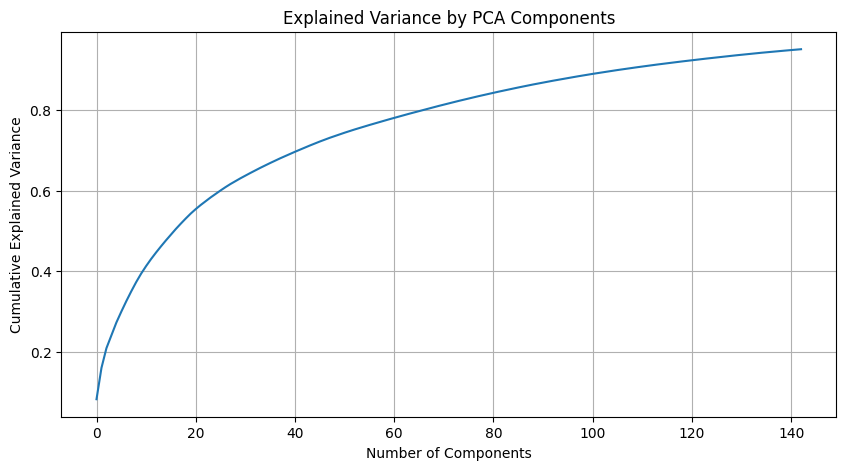

In [139]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

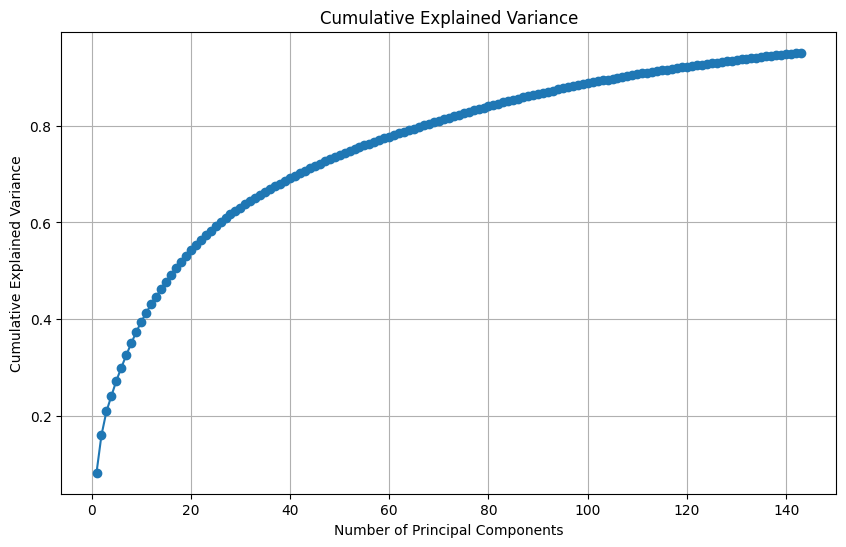

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

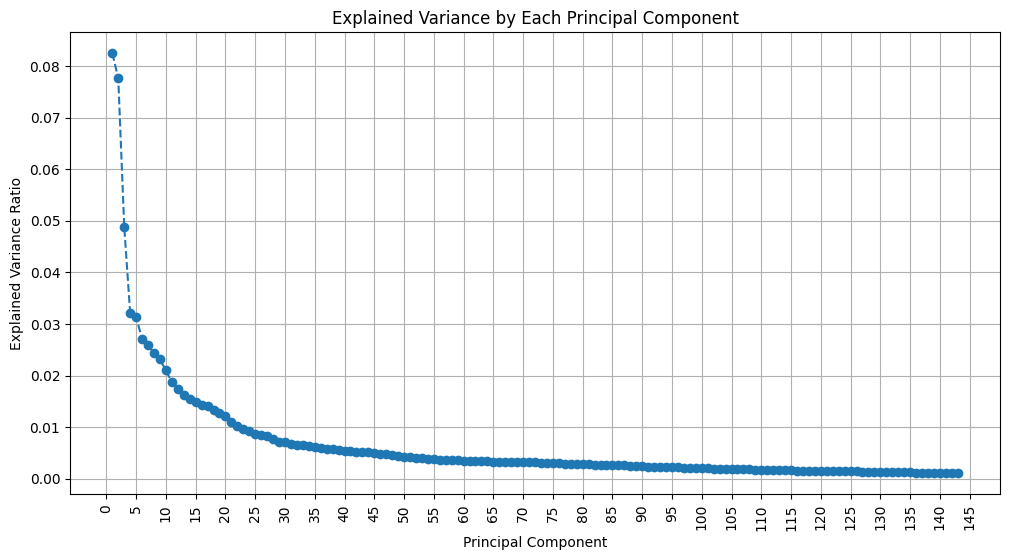

<Figure size 640x480 with 0 Axes>

In [141]:


# Number of components
n_components = len(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Set x-ticks to show all component numbers
plt.xticks(np.arange(0, n_components + 5, 5), rotation=90)

plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

In [142]:
# Assuming `pca` is your fitted PCA object
explained_variance_ratio = pca.explained_variance_ratio_
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print cumulative variance explained by first 6 PCs
print(f"Cumulative variance explained by first 6 PCs: {cumulative_variance[5]:.4f}")


Cumulative variance explained by first 6 PCs: 0.2998


In [143]:
##I want to see loadings
pc_loadings = pd.DataFrame(
    pca.components_[:6],  # First 6 components
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(6)]
)

# Display all loadings (not truncated)
pd.set_option('display.max_columns', None)
print(pc_loadings)

     TransactionID  TransactionAmt     card1     card2     card3     card5  \
PC1      -0.011925       -0.027368  0.001631  0.015797  0.138952 -0.035466   
PC2       0.018563        0.013226  0.009020  0.003470 -0.024777 -0.015674   
PC3       0.003485        0.009526 -0.005784 -0.010321 -0.016442  0.011971   
PC4      -0.020588       -0.005833 -0.001612  0.004952  0.009069  0.003116   
PC5      -0.002328        0.006905 -0.004477 -0.001256  0.005009  0.003536   
PC6      -0.005902        0.031602 -0.000934  0.005548 -0.005739 -0.001110   

        addr1     addr2     dist1        C1        C3        C5        C7  \
PC1  0.002015 -0.031855  0.000320  0.016577  0.002754 -0.023903  0.021907   
PC2  0.002378  0.005623  0.000709  0.003526  0.005316  0.002698 -0.003587   
PC3 -0.001698  0.004124  0.000832  0.000869 -0.007272  0.006661 -0.003653   
PC4  0.004110  0.000039 -0.006268 -0.012606  0.017091 -0.002505 -0.001361   
PC5 -0.002121  0.000420  0.002962  0.002891  0.017761 -0.002623  0.0

In [144]:
# Top contributing features per PC
for i in range(6):
    print(f"\nTop features in PC{i+1}:")
    print(pc_loadings.iloc[i].abs().sort_values(ascending=False).head(10))


Top features in PC1:
V71    0.180814
V92    0.180536
V50    0.179300
V57    0.179167
V63    0.178946
V31    0.178929
V15    0.178828
V84    0.178486
V42    0.177085
V79    0.176794
Name: PC1, dtype: float64

Top features in PC2:
V183    0.170846
V181    0.166894
V328    0.166765
V338    0.159897
V105    0.158025
V104    0.157292
V180    0.154790
V136    0.152765
V297    0.150939
V327    0.147576
Name: PC2, dtype: float64

Top features in PC3:
V258    0.188353
V230    0.184685
V246    0.184294
V257    0.178873
V242    0.177423
V228    0.170953
V243    0.165908
V170    0.157234
V229    0.156132
V201    0.155634
Name: PC3, dtype: float64

Top features in PC4:
V264    0.203060
V277    0.196528
V265    0.171320
V278    0.165822
V224    0.162081
V274    0.160245
V261    0.153608
V248    0.150465
V267    0.147163
V236    0.139441
Name: PC4, dtype: float64

Top features in PC5:
V266    0.237421
V309    0.228721
V129    0.225838
V206    0.224476
V311    0.224227
V334    0.220098
V268    0.2194

In [149]:
# Threshold: how high a loading must be to count as "important"
threshold = 0.1  # Adjust as needed
# For each PC, get the features with loadings above the threshold
important_features_per_pc = []
for i in range(6):
    important = pc_loadings.iloc[i][pc_loadings.iloc[i] > threshold].index.tolist()
    important_features_per_pc.append(set(important))
print(important_features_per_pc)


[{'V303', 'V57', 'V39', 'V71', 'V80', 'card3', 'V85', 'V17', 'V59', 'V31', 'V50', 'M4', 'V42', 'V84', 'V92', 'V51', 'V40', 'V64', 'V15', 'V63', 'V73', 'V302', 'V79'}, {'V210', 'V165', 'V96', 'V185', 'V215', 'V226', 'V335', 'V320', 'V263', 'V327', 'V216', 'V326', 'V235', 'V209', 'V265', 'V100', 'V180', 'V218', 'V234', 'V264', 'V321', 'V95', 'V294', 'V328', 'V236', 'V336', 'V203', 'V175', 'V137', 'V274', 'V339', 'V104', 'V171', 'V136', 'V181', 'V183', 'V297', 'V338', 'V105'}, {'V176', 'V246', 'V221', 'V243', 'V200', 'V228', 'V189', 'V242', 'V261', 'V252', 'V248', 'V201', 'V86', 'V257', 'V45', 'V262', 'V188', 'V170', 'V229', 'V247', 'V230', 'V259', 'V190', 'V258', 'V44'}, {'V268', 'V226', 'V243', 'V263', 'V261', 'V248', 'V265', 'V218', 'V264', 'V262', 'V224', 'V278', 'V236', 'V275', 'V276', 'V229', 'V337', 'V267', 'V274', 'V277'}, {'V310', 'V129', 'V267', 'V311', 'V205', 'V268', 'V335', 'V131', 'V334', 'V130', 'V223', 'V266', 'V206', 'V336', 'V309', 'V312'}, {'V139', 'V283', 'V148', 'V300